In [1]:
%matplotlib inline

## Decomposition: [Non-Negative Matrix Factorization (NNMF)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF)
- NMF assumes data and components are non-negative, and can replace PCA or its variants. It finds a decomposition of samples *X* into two matrices, *W* and *H* by optimizing the distance _d_ between *X* and the matrix product *WH*.
- The *squared Frobenius norm* is the most widely used distance function. It is defined as $d_{\mathrm{Fro}}(X, Y) = \frac{1}{2} ||X - Y||_{\mathrm{Fro}}^2 = \frac{1}{2} \sum_{i,j} (X_{ij} - {Y}_{ij})^2$ - it is an extension of a Euclidean norm to matrices.
- ```init``` determines the initialization method & has a big impact on performance.
- NMF uses "NNDSVD" (Non-negative Double Singular Value Decomposition) at its core. The base algorithm is best for sparse factorization; "NNDSVDa" and/or "NNDSVDar) are better for dense matrices.
- L1 and L2 priors can be added to the loss function for regularization.

In [2]:
import numpy as np
from sklearn.decomposition import NMF

X     = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
model = NMF(n_components = 2, 
            init         = 'random', 
            random_state = 0)
W     = model.fit_transform(X)
H     = model.components_

X_new = np.array([[1, 0], [1, 6.1], [1, 0], [1, 4], [3.2, 1], [0, 4]])
W_new = model.transform(X_new)
W_new

array([[0.46677737, 0.        ],
       [0.        , 1.66350401],
       [0.46677737, 0.        ],
       [0.        , 1.17156989],
       [1.2277735 , 0.29280011],
       [0.        , 0.93701736]])

## Example: topic extraction - NNMF

In [3]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

In [4]:
print("Loading 20 newsgroups...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading 20 newsgroups...
done in 1.174s.


In [5]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 0.221s.


In [6]:
# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.313s.


In [7]:
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, 
                tfidf_feature_names, 
                n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know good time make way really say ve right want did ll new use years
Topic #1: windows use dos using window program os application drivers help software pc running ms screen files version work code mode
Topic #2: god jesus bible faith christian christ christians does sin heaven believe lord life mary church atheism love belief human religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information list send video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil speed power good 000 brake year models used bought
Topic #5: edu soon send com university internet mit ftp mail cc pub article information hope email mac home program blood contact
Topic #6: file files problem format win sound ftp pub read save site image help available create copy running memory self version
Topic #7: game team games year win play season playe

In [8]:
# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, 
          random_state=1,
          beta_loss='kullback-leibler', 
          solver='mu', 
          max_iter=1000, 
          alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.016s.


In [9]:
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: people don think just right did like time say really know make said question course let way real things good
Topic #1: windows thanks help hi using looking does info software video use dos pc advance anybody mail appreciated card need know
Topic #2: god does jesus true book christian bible christians religion faith church believe read life christ says people lord exist say
Topic #3: thanks know bike interested car mail new like price edu heard list hear want cars email contact just com mark
Topic #4: 10 time year power 12 sale 15 new offer 20 30 00 16 monitor ve 11 14 condition problem 100
Topic #5: space government 00 nasa public security states earth phone 1993 research technology university subject information science data internet provide blood
Topic #6: edu file com program try problem files soon window remember sun win send library mike article just mit oh code
Topic #7: game team year games play world seas

## Example: Beta-divergence loss functions
- The squared Frobenius norm is the most common loss function, but other options exist:
- The Generalized Kullback-Leibler (KL) divergence:
$d_{KL}(X, Y) = \sum_{i,j} (X_{ij} \log(\frac{X_{ij}}{Y_{ij}}) - X_{ij} + Y_{ij})$
- The Itakura-Saito (IS) divergence:
$d_{IS}(X, Y) = \sum_{i,j} (\frac{X_{ij}}{Y_{ij}} - \log(\frac{X_{ij}}{Y_{ij}}) - 1)$
- All three are special cases of the beta-divergence family with beta = 2,1,0 respectively.

Automatically created module for IPython interactive environment


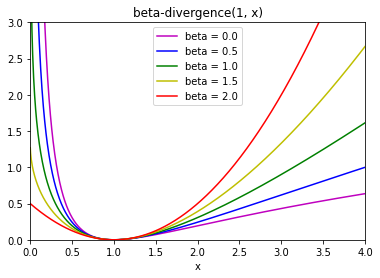

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition._nmf import _beta_divergence

print(__doc__)

x = np.linspace(0.001, 4, 1000)
y = np.zeros(x.shape)

colors = 'mbgyr'
for j, beta in enumerate((0., 0.5, 1., 1.5, 2.)):
    for i, xi in enumerate(x):
        y[i] = _beta_divergence(1, xi, 1, beta)
    name = "beta = %1.1f" % beta
    plt.plot(x, y, label=name, color=colors[j])

plt.xlabel("x")
plt.title("beta-divergence(1, x)")
plt.legend(loc=0)
plt.axis([0, 4, 0, 3])
plt.show()